In [4]:
import pickle
import pandas as pd
import numpy as np

In [5]:

from IPython.display import Audio
import torch
import torchaudio
from IPython.display import Audio, display

In [6]:
pkl_results_file = "SE_measures_mode2.pickle"
with open(pkl_results_file, "rb") as handle:
    results = pickle.load(handle)

In [13]:
df = pd.DataFrame.from_dict(results)
df["pesq_diff"] = df["pesq_enhanced"].sub(df["pesq_noisy"])
df["stoi_diff"] = df["stoi_enhanced"].sub(df["stoi_noisy"])




In [14]:
df = df[
    [
        "pesq_noisy",
        "stoi_noisy",
        "pesq_enhanced",
        "stoi_enhanced",
        "pesq_diff",
        "stoi_diff",
    ]
]
df.describe()

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,1.970835,0.921086,2.645921,0.925985,0.675087,0.004899
std,0.753248,0.070952,0.645769,0.062959,0.404727,0.016466
min,1.031246,0.560032,1.229977,0.591346,-0.579006,-0.070348
25%,1.290071,0.887223,2.193447,0.893281,0.383648,-0.003455
50%,1.796571,0.940099,2.666502,0.943750,0.604530,0.002390
75%,2.552874,0.975418,3.091064,0.974250,0.927740,0.012899
max,4.300500,0.999815,4.243578,0.998613,2.058601,0.080587


<Axes: title={'center': 'stoi_diff'}, ylabel='Frequency'>

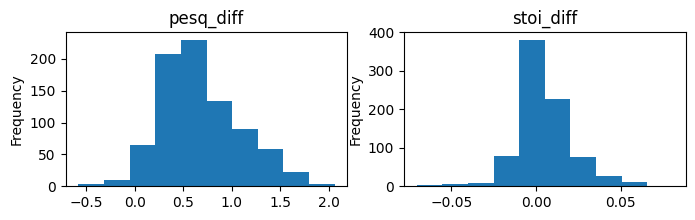

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
# fig, ax = plt.subplots((1, 2), figsize=(3, 2))
df["pesq_diff"].plot(kind="hist", ax=ax1, title="pesq_diff")
# fig2, ax2 = plt.subplots((2, 2), figsize=(3, 2))
df["stoi_diff"].plot(kind="hist", ax=ax2, title="stoi_diff")

In [16]:
import os


def display_all(df_):
    parent_dir = "/data/ephraim/datasets_16k/"
    clean, noisy, enhanced = (
        "/data/ephraim/datasets_16k/clean_testset_wav",
        "/data/ephraim/datasets_16k/noisy_testset_wav",
        "/data/ephraim/output/Enhanced/mode_output/datasets_16k/noisy_testset_wav/",
    )
    for fname in df_.index:
        print("*********")
        print(fname)
        for type_ in [clean, noisy, enhanced]:
            path = os.path.join(type_, fname)
            print(path)
            display(Audio(path, rate=16000, autoplay=False))

In [17]:
display_all(df.nsmallest(3,['pesq_noisy']))

*********
p257_050.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_050.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_050.wav


/data/ephraim/output/Enhanced/mode_output/datasets_16k/noisy_testset_wav/p257_050.wav


*********
p257_151.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_151.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_151.wav


/data/ephraim/output/Enhanced/mode_output/datasets_16k/noisy_testset_wav/p257_151.wav


*********
p257_291.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_291.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_291.wav


/data/ephraim/output/Enhanced/mode_output/datasets_16k/noisy_testset_wav/p257_291.wav


In [18]:
df.nsmallest(5,['pesq_noisy'])

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
p257_050.wav,1.031246,0.639657,1.433179,0.647062,0.401933,0.007405
p257_151.wav,1.036140,0.672111,1.229977,0.700926,0.193837,0.028815
p257_291.wav,1.036283,0.603448,1.704587,0.632768,0.668303,0.029320
p257_427.wav,1.037009,0.709697,1.403519,0.758010,0.366511,0.048313
p257_171.wav,1.040026,0.741772,1.513216,0.822359,0.473189,0.080587


In [19]:
df2=df

In [20]:
df2.nsmallest(50, ["pesq_noisy"]).describe()

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.073243,0.798540,1.713414,0.820484,0.640171,0.021944
std,0.021091,0.077330,0.307467,0.073283,0.297984,0.021148
min,1.031246,0.603448,1.229977,0.632768,0.193837,-0.014325
25%,1.055638,0.756045,1.480424,0.783038,0.405027,0.007256
50%,1.075446,0.802397,1.694315,0.822675,0.628245,0.022295
75%,1.090291,0.852728,1.905075,0.871581,0.815606,0.033543
max,1.104712,0.935811,2.518587,0.943017,1.413876,0.080587


In [21]:
df2.nlargest(50, ["pesq_noisy"]).describe()

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.596466,0.987558,3.782863,0.979910,0.186397,-0.007647
std,0.228835,0.014495,0.240545,0.017860,0.233384,0.012807
min,3.326328,0.921624,2.879405,0.902580,-0.579006,-0.070348
25%,3.414954,0.981811,3.653519,0.975622,0.066358,-0.010782
50%,3.542273,0.993252,3.759531,0.984659,0.219600,-0.003854
75%,3.712383,0.997092,3.934240,0.988762,0.346139,-0.001913
max,4.300500,0.999815,4.243578,0.998460,0.655376,0.006708
